<a href="https://colab.research.google.com/github/sergienko4/kalman-filter/blob/main/kalman_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np

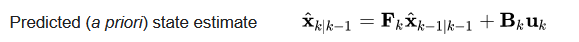

we don't have the 
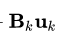

In [34]:
def predict_state(matrix_f, state):
    return np.dot(matrix_f, state)

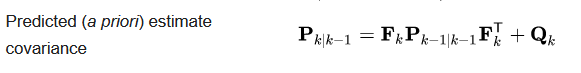

we don't have
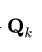

In [35]:
def predict_estimation(matrix_f, matrix_p):
    matrix_f_t = np.transpose(matrix_f)
    # print(f'matrix_f \t\n {matrix_f}')
    # print(f'matrix_p \t\n {matrix_p}')
    # print(f'matrix_f_t \t\n {matrix_f_t}')
    t = np.dot(matrix_f, matrix_p)
    return np.dot(t, matrix_f_t)

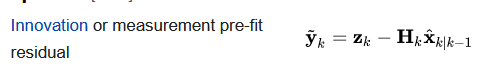

In [36]:
def pre_fit(sensor_input, matrix_h, state):
    transform_input = np.dot(matrix_h, state)

    # print(f'sensor_input \t\n {sensor_input}')
    # print(f'matrix_h \t\n {matrix_h}')
    # print(f'state \t\n {state}')
    # print(f'transform_input \t\n {transform_input}')

    return sensor_input - transform_input

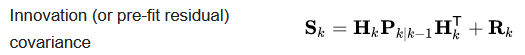

In [37]:
def get_s(matrix_h, matrix_p, matrix_r):
    matrix_h_t = np.transpose(matrix_h)
    t = np.dot(matrix_h, matrix_p)

    # print(f'matrix_h \t\n {matrix_h}')
    # print(f'matrix_p \t\n {matrix_p}')
    # print(f'matrix_h_t \t\n {matrix_h_t}')
    # print(f'matrix_h_t \t\n {matrix_r}')

    return np.dot(t, matrix_h_t) + matrix_r

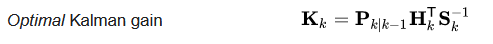

In [38]:
def calc_gain(matrix_p, matrix_h, matrix_s):
    matrix_h_t = np.transpose(matrix_h)
    matrix_s_invert = np.linalg.inv(matrix_s)

    # print(f'matrix_p \t\n {matrix_p}')
    # print(f'matrix_h_t \t\n {matrix_h_t}')
    # print(f'matrix_s_invert \t\n {matrix_s_invert}')

    t = np.dot(matrix_p, matrix_h_t)
    return np.dot(t, matrix_s_invert)

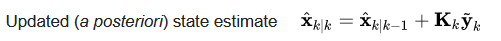

In [39]:
def update_state(current_state, calman_gain, sensor_input):
    # print(f'current_state \t\n {current_state}')
    # print(f'calman_gain \t\n {calman_gain}')
    # print(f'sensor_input \t\n {sensor_input}')
    t = np.dot(calman_gain, sensor_input)
    return current_state + t

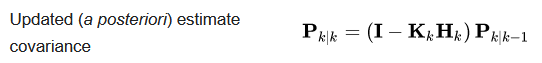

In [40]:
def update_estimation(calman_gain, matrix_h, matrix_p, n):
    gain_dot_h = np.dot(calman_gain, matrix_h)
    matrix_i = np.identity(gain_dot_h.shape[1])
    z = np.subtract(matrix_i, gain_dot_h)
    # print(f'gain_dot_h \t\n {gain_dot_h}')
    # print(f'z \t\n {z}')

    # print(f'matrix_i \t\n {matrix_i}')
    # print(f'calman_gain \t\n {calman_gain}')
    # print(f'matrix_h \t\n {matrix_h}')
    # print(f'matrix_p \t\n {matrix_p}')

    return np.dot(z, matrix_p)

running code with data

**Question 1**

In [41]:
sigma_location = 2
sigma_speed = 1.2
delta = 1
feet = 1 / 0.3048

state = np.array([[8],
          [5]])

sensor_data = np.array([[43]])
matrix_p = np.array([
[np.square(sigma_location), 0],
[0, np.square(sigma_speed)]])
matrix_f = np.array([
[1, delta],
[0, 1]
])
matrix_r = np.array([
[np.sqrt(0.25)],

])
matrix_h = np.array([[feet, 0]])

print(f'matrix_f:\t\n{matrix_f}')
print(f'state:\t\n{state}')

state = predict_state(matrix_f, state)
print(f'prediction_x:\t\n{state}')
# update P
print(f'matrix_p:\t\n {matrix_p}')
matrix_p = predict_estimation(matrix_f=matrix_f, matrix_p=matrix_p)
print(f'matrix_p:\t\n {matrix_p}')

y = pre_fit(sensor_input=sensor_data, matrix_h=matrix_h, state=state)
print(f'y:\t\n {y}')
matrix_s = get_s(matrix_h=matrix_h, matrix_p=matrix_p, matrix_r=matrix_r)
print(f'matrix_s:\t\n {matrix_s}')

gain = calc_gain(matrix_p, matrix_h, matrix_s)
print(f'gain:\t\n {gain}')

state = update_state(state, gain, y)
print(f'state:\t\n {state}')

matrix_p = update_estimation(calman_gain=gain, matrix_h=matrix_h, matrix_p=matrix_p, n=matrix_f.shape[1])
print(f'matrix_p:\t\n {matrix_p}')

matrix_f:	
[[1 1]
 [0 1]]
state:	
[[8]
 [5]]
prediction_x:	
[[13]
 [ 5]]
matrix_p:	
 [[4.   0.  ]
 [0.   1.44]]
matrix_p:	
 [[5.44 1.44]
 [1.44 1.44]]
y:	
 [[0.34908136]]
matrix_s:	
 [[59.05567267]]
gain:	
 [[0.30221938]
 [0.07999925]]
state:	
 [[13.10549916]
 [ 5.02792625]]
matrix_p:	
 [[0.04605823 0.01219189]
 [0.01219189 1.06205079]]


**Question 2**

In [42]:
sigma_location = 2
sigma_speed = 1.2
delta = 1
feet = 1 / 0.3048
state = np.array([[8],
                [5]])

sensor_data = np.array([[43], [4]])
matrix_p = np.array([
  [np.square(sigma_location), 0],
  [0, np.square(sigma_speed)]])
matrix_f = np.array([
  [1, delta],
  [0, 1]
])
matrix_h = np.array([[feet, 0], [0, 1]])
t = np.sqrt(0.25)
matrix_r = np.array([
  [t, 0], [0, t]

])

print(f'matrix_f:\t\n{matrix_f}')
print(f'state:\t\n{state}')
state = predict_state(matrix_f, state)
print(f'prediction_x:\t\n{state}')
# update P
print(f'matrix_p:\t\n {matrix_p}')
matrix_p = predict_estimation(matrix_f=matrix_f, matrix_p=matrix_p)
print(f'matrix_p:\t\n {matrix_p}')

y = pre_fit(sensor_input=sensor_data, matrix_h=matrix_h, state=state)
print(f'y:\t\n {y}')
matrix_s = get_s(matrix_h, matrix_p, matrix_r)
print(f'matrix_s:\t\n {matrix_s}')

gain = calc_gain(matrix_p, matrix_h, matrix_s)
print(f'gain:\t\n {gain}')

state = update_state(state, gain, y)
print(f'state:\t\n {state}')

matrix_p = update_estimation(calman_gain=gain, matrix_h=matrix_h, matrix_p=matrix_p, n=matrix_f.shape[1])
print(f'matrix_p:\t\n {matrix_p}')

matrix_f:	
[[1 1]
 [0 1]]
state:	
[[8]
 [5]]
prediction_x:	
[[13]
 [ 5]]
matrix_p:	
 [[4.   0.  ]
 [0.   1.44]]
matrix_p:	
 [[5.44 1.44]
 [1.44 1.44]]
y:	
 [[ 0.34908136]
 [-1.        ]]
matrix_s:	
 [[59.05567267  4.72440945]
 [ 4.72440945  1.94      ]]
gain:	
 [[0.30159499 0.00780505]
 [0.02560712 0.67990798]]
state:	
 [[13.09747614]
 [ 4.32903099]]
matrix_p:	
 [[0.04596308 0.00390253]
 [0.00390253 0.33995399]]
